In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/cosma/home/durham/dc-wils7/DESI/')

from   scipy.spatial.transform import Rotation as R
from   astropy.table import Table
from   cosmo import cosmo
from   cartesian import cartesian

In [5]:
def rotate2rosette(ros_ra, ros_dec, pos):
    pos        = np.array(pos, copy=True)
    
    rot        = R.from_rotvec(-np.radians(90. - ros_dec) * np.array([1, 0, 0]))
    res        = rot.apply(pos)
    
    rot        = R.from_rotvec(np.radians(ros_ra - 90.) * np.array([0, 0, 1]))
    
    resres     = rot.apply(res)
    
    return  resres

In [6]:
inner = 0.5 # deg.                                                                                                                                                                                  
outer = 1.5 # deg.                                                                                                                                                                                  

ras   = np.arange(0., 360., 1.e-3)
idecs = (90. - inner) * np.ones_like(ras)
odecs = (90. - outer) * np.ones_like(ras)

np.random.shuffle(ras)

randoms = np.c_[ras, idecs]
randoms = np.vstack((randoms, np.c_[ras, odecs]))

randoms = Table(randoms, names=['BOUND_RA', 'BOUND_DEC'])
randoms['Z'] = 0.2

In [7]:
randoms

BOUND_RA,BOUND_DEC,Z
float64,float64,float64
325.719,89.5,0.2
281.45,89.5,0.2
208.651,89.5,0.2
311.857,89.5,0.2
187.286,89.5,0.2
60.266,89.5,0.2
268.25600000000003,89.5,0.2
47.273,89.5,0.2
142.166,89.5,0.2


In [8]:
xyz = cartesian(randoms['BOUND_RA'], randoms['BOUND_DEC'], randoms['Z'], rotate=False)
xyz

array([[  4.15321354,  -2.8311125 , 575.96478571],
       [  0.99779805,  -4.92633532, 575.96478571],
       [ -4.41092256,  -2.41000889, 575.96478571],
       ...,
       [-12.72858384,  -8.08185667, 575.78934126],
       [ -7.0119523 ,  13.34787544, 575.78934126],
       [-12.68054367,  -8.15702555, 575.78934126]])

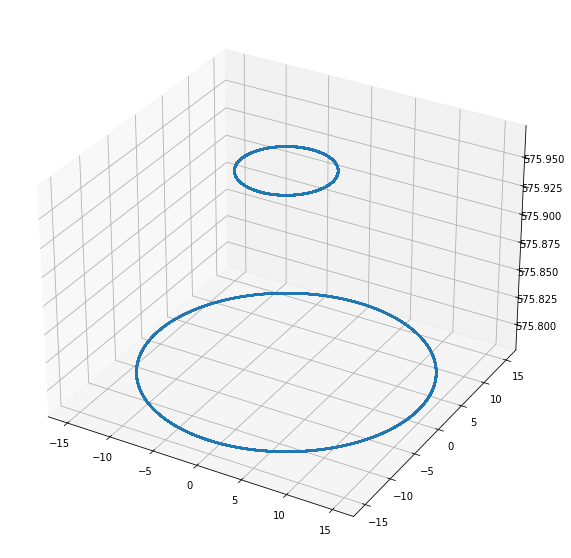

In [9]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(xyz[::10, 0],\
           xyz[::10, 1],\
           xyz[::10, 2],\
           marker='.',\
           lw=0.0)

# ax.set_xlim(0.0, 1000.)

In [10]:
ros_xyz = rotate2rosette(90.0, 0.0, xyz)

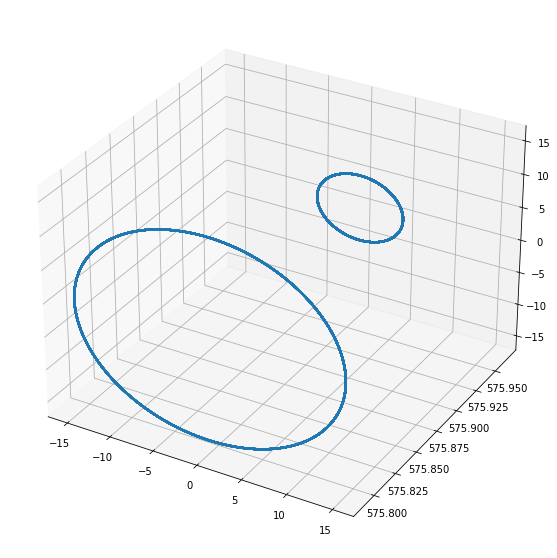

In [11]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(ros_xyz[::10, 0],\
           ros_xyz[::10, 1],\
           ros_xyz[::10, 2],\
           marker='.',\
           lw=0.0)

# ax.set_xlim(0.0, 1000.)

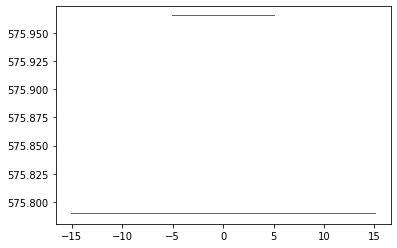

In [12]:
pl.plot(ros_xyz[::10, 0], ros_xyz[::10, 1], marker=',', lw=0.0)

In [24]:
ras = np.degrees(np.arctan2(ros_xyz[:,1], ros_xyz[:,0]))

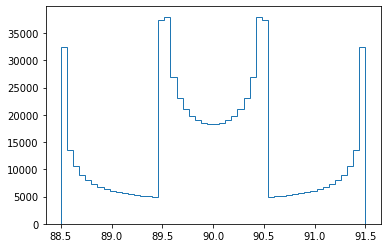

In [25]:
_   = pl.hist(ras, bins=50, histtype='step')

In [26]:
chis   = cosmo.comoving_distance(randoms['Z'].data).value # Mpc/h

In [27]:
thetas = np.degrees(np.arccos(ros_xyz[:,2] / chis))

In [28]:
thetas

array([89.7183764 , 89.50995109, 89.76026576, ..., 89.19603793,
       91.32788721, 89.18855983])

In [29]:
decs   = 90. - thetas

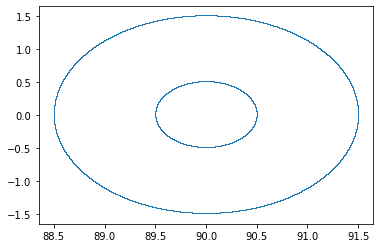

In [30]:
pl.plot(ras, decs, marker=',', lw=0.0)

In [31]:
bound = Table.read('/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_R10_0.fits', 'BOUNDARY')
bound

BOUND_RA,BOUND_DEC,Z,V,BOUNDID,FIELD,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
float64,float64,float64,float64,int64,bytes3,bytes3,float64,float64,float64,float64,float64,float64
-142.44479077273564,2.3551082370800884,0.03929302086300004,22.474041552241374,0,R10,NAN,-92.61179641437812,-71.20541805283972,4.804564302870492,116.91535136716459,-1.0088222351614036,-0.15207139310661333
-141.81109621001931,1.9496521877511839,0.20463238266637868,129199.07148998881,1,R10,NAN,-462.47323086429225,-363.7855406371597,20.029916385525304,588.7242466556353,1.426487588758505,-4.932841579917454
-141.7997363297212,1.9530786458292653,0.0696437909950573,4580.547426108004,2,R10,NAN,-161.79770107377104,-127.3234415072336,7.020948854436561,205.99956350379028,0.5399596593068452,-1.7137189484048685
-142.44396520963002,2.3498582071420486,0.19067538691769761,105275.68532996958,3,R10,NAN,-435.824343617134,-335.0974839678836,22.559719405237228,550.199121015721,-4.73957523814579,-0.7660617761147961
-141.79245821209543,1.9554296046217274,0.23115423638545968,183490.4684306468,4,R10,NAN,-519.31419652057,-408.7706738524047,22.56419976616013,661.2537911311695,1.8172066166686136,-5.47385562557519
-142.034050822958,1.937104718699942,0.16118770234437466,64406.92845606852,5,R10,NAN,-368.76478217522964,-287.75785636693075,15.820191994549504,468.0017785580514,-0.6861750918310179,-4.023851217945566
-141.50744851982387,2.6635276451232244,0.23725662631612568,197702.82489225332,6,R10,NAN,-529.9660535937812,-421.44155715373495,31.499695827951317,677.8157765225014,5.229926984361953,2.766921777289852
-141.64405336998897,2.825719342217482,0.14445986737925945,46577.12486550122,7,R10,NAN,-329.6619633735357,-260.8744052565262,20.749941080214192,420.8913424212126,2.244807711001471,2.9093266030518876
-142.0716221959223,1.9449951743449247,0.11146461946982777,21304.303803611223,8,R10,NAN,-257.7582924744716,-200.86446734784948,11.097359660377103,326.9570161719253,-0.6936602055276069,-2.7661137346414204


(0.0, 1000.0)

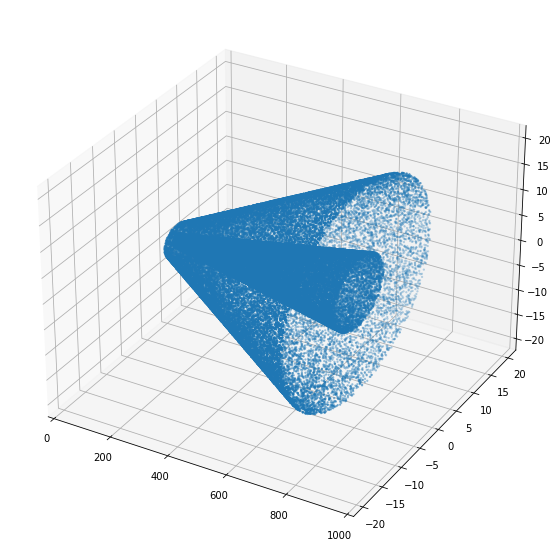

In [32]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

pos = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)